In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from utils.nets import *
from utils.model_tools import *
from utils.feature_extractor import *
from utils.dataset_tools import *
from utils.cosine_similarity import *

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Constants

LEARNING_RATE = 0.001 # Different for CIFAR100
EXP_DECAY = 0.0001

batch_size = 64

# Files
CIFAR10_model_file = "./logs/cifar_10_cnn.pt"
FNIST_model_no_boot_bag_file = "./logs/fnist_no_boot_bag.pt"
VGG11_model_file = "./logs/vgg11.pt"
VGG19_model_file = "./logs/vgg19.pt"

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
# Loading general CIFAR10 trainsets/testsets
CIFAR10_train_gen = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
CIFAR10_trainloader_gen = torch.utils.data.DataLoader(CIFAR10_train_gen, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

CIFAR10_test_gen = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
CIFAR10_testloader_gen = torch.utils.data.DataLoader(CIFAR10_test_gen, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

CIFAR10_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# In the paper, the classes left out are 'cat' and 'car'; 'cat' is added back in later

CIFAR10_cnn = CIFAR10Cnn(8)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Filtering classes from CIFAR10

# Creates dataloader without cat and car (indices 1 and 3) classes
no_cat_car_idx = np.where((np.array(CIFAR10_train_gen.targets) != 1) & (np.array(CIFAR10_train_gen.targets) != 3))[0]
no_cat_car_subset = torch.utils.data.Subset(CIFAR10_train_gen, no_cat_car_idx)
no_cat_car_dl = torch.utils.data.DataLoader(no_cat_car_subset, batch_size=batch_size, shuffle=True, num_workers=2)

# Dataloader for everything but car
no_car_idx = np.where((np.array(CIFAR10_train_gen.targets) != 1))[0]
no_car_subset = torch.utils.data.Subset(CIFAR10_train_gen, no_car_idx)
no_car_dl = torch.utils.data.DataLoader(no_car_subset, batch_size=batch_size, shuffle=True, num_workers=2)

# TODO: make a nice little function for this
# TODO: be able to create subsets with certain amounts of classes combined
# not sure if there's an official way but
# could also just get idx of classes and then take random indexes, or maybe there's a way to do that with subset


In [6]:
vgg11 = torchvision.models.vgg11(progress=True)
vgg19 = torchvision.models.vgg19(progress=True)

In [ ]:
# CIFAR100 dataset for VGG11 and VGG19

CIFAR100_train_gen = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
CIFAR100_trainloader_gen = torch.utils.data.DataLoader(CIFAR100_train_gen, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Filtering last 10 classes from CIFAR 100

# Creates dataloader without cat and car (indices 1 and 3) classes
first_90_idx = np.where((np.array(CIFAR100_train_gen.targets) != 90) & 
                        (np.array(CIFAR100_train_gen.targets) != 91) & 
                        (np.array(CIFAR100_train_gen.targets) != 92) & 
                        (np.array(CIFAR100_train_gen.targets) != 93) & 
                        (np.array(CIFAR100_train_gen.targets) != 94) & 
                        (np.array(CIFAR100_train_gen.targets) != 95) & 
                        (np.array(CIFAR100_train_gen.targets) != 96) & 
                        (np.array(CIFAR100_train_gen.targets) != 97) & 
                        (np.array(CIFAR100_train_gen.targets) != 98) & 
                        (np.array(CIFAR100_train_gen.targets) != 99))[0]
first_90_subset = torch.utils.data.Subset(CIFAR100_train_gen, first_90_idx)
first_90_dl = torch.utils.data.DataLoader(first_90_subset, batch_size=batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified


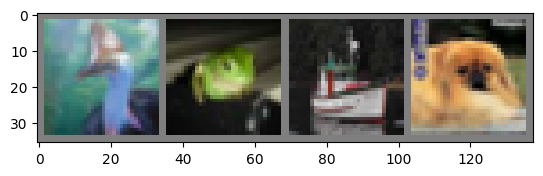

bird  frog  ship  dog  


In [13]:
# Numpy function to show images for verification

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(CIFAR10_trainloader_gen)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{CIFAR10_classes[labels[j]]:5s}' for j in range(batch_size)))


In [4]:
criterion = nn.CrossEntropyLoss()
CIFAR10_optim = optim.Adam(CIFAR10_cnn.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

NameError: name 'CIFAR10_cnn' is not defined

In [1]:
'''
CIFAR10_cnn_test = CIFAR10Cnn(10)

for epoch in range(5):
    e_loss = train(CIFAR10_trainloader_gen, CIFAR10_cnn_test, criterion, CIFAR10_optim, 'cpu')
    print("Epoch", epoch, "loss:", e_loss)
    '''

'\nCIFAR10_cnn_test = CIFAR10Cnn(10)\n\nfor epoch in range(5):\n    e_loss = train(CIFAR10_trainloader_gen, CIFAR10_cnn_test, criterion, CIFAR10_optim, \'cpu\')\n    print("Epoch", epoch, "loss:", e_loss)\n    '

In [ ]:
# Training our base model with 8 classes

for epoch in range(15):
    e_loss = train(no_cat_car_dl, CIFAR10_cnn, criterion, CIFAR10_optim, 'cpu')
    print("Epoch", epoch, "loss:", e_loss)
    
torch.save(CIFAR10_cnn.state_dict(), CIFAR10_model_file)

In [3]:
# Loading general Fashion MNIST trainsets/testsets: https://github.com/zalandoresearch/fashion-mnist

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))])


FMNIST_train_gen = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
FMNIST_trainloader_gen = torch.utils.data.DataLoader(FMNIST_train_gen, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

FMNIST_test_gen = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
FMNIST_testloader_gen = torch.utils.data.DataLoader(FMNIST_test_gen, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

FMNIST_classes = {'T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'}


# Paper leaves out 'Ankle boot' and 'Bag' class, which are indices 8 and 9 respectively
# TODO: clean this up to use the nice subset code

no_boot_bag_train_idx = np.where((np.array(FMNIST_train_gen.targets) != 8) & 
                        (np.array(FMNIST_train_gen.targets) != 9))[0]
no_boot_bag_train_subset = torch.utils.data.Subset(FMNIST_train_gen, no_boot_bag_train_idx)
no_boot_bag_train_dl = torch.utils.data.DataLoader(no_boot_bag_train_subset, batch_size=batch_size, shuffle=True, num_workers=2)

no_boot_bag_test_idx = np.where((np.array(FMNIST_test_gen.targets) != 8) & 
                        (np.array(FMNIST_test_gen.targets) != 9))[0]
no_boot_bag_test_subset = torch.utils.data.Subset(FMNIST_test_gen, no_boot_bag_test_idx)
no_boot_bag_test_dl = torch.utils.data.DataLoader(no_boot_bag_test_subset, batch_size=batch_size, shuffle=True, num_workers=2)

boot_train_idx = np.where((np.array(FMNIST_train_gen.targets) == 9))[0]
boot_train_subset = torch.utils.data.Subset(FMNIST_train_gen, boot_train_idx)
boot_train_dl = torch.utils.data.DataLoader(boot_train_subset, batch_size=batch_size, shuffle=True, num_workers=2)

no_bag_test_idx = np.where((np.array(FMNIST_test_gen.targets) != 8))[0]
no_bag_test_subset = torch.utils.data.Subset(FMNIST_test_gen, no_bag_test_idx)
no_bag_test_dl = torch.utils.data.DataLoader(no_bag_test_subset, batch_size=1, shuffle=True, num_workers=2)

In [4]:
criterion = nn.CrossEntropyLoss()
linear_model = LinearFashionMNIST(8)
FMNIST_optim = optim.Adam(linear_model.parameters(), lr=LEARNING_RATE)

num_epochs = 15

decay_rate = (EXP_DECAY/LEARNING_RATE)**(1/num_epochs)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=FMNIST_optim, gamma=decay_rate) 
# TODO: we need to use the scheduler for cnn too if we use that

In [7]:
# Training our base model with 8 classes

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train(no_boot_bag_train_dl, linear_model, criterion, FMNIST_optim, 'cpu')
    test_loss = test(no_boot_bag_test_dl, linear_model, criterion, 'cpu')
    
    print("Epoch", epoch, "train loss:", train_loss, "test loss:", test_loss)
    
    lr_scheduler.step()
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
print("Finished training, saving to", FNIST_model_no_boot_bag_file)
torch.save(linear_model.state_dict(), FNIST_model_no_boot_bag_file)

loss: 2.088859  [    0/48000]


KeyboardInterrupt: 

In [4]:
# Extracting features from linear model trained on 8 classes

linear_model = LinearFashionMNIST_alt(28*28, 8)

fmnist_file = './weights/linear_fashionmnist_holdout_[8, 9].pt'

linear_model.load_state_dict(torch.load(fmnist_file))
linear_model.eval()

last_layer = 'input_layer'
print("Layer to be extracted:", last_layer)

fnist_feature_ext = FeatureExtractor(linear_model, [last_layer])

Layer to be extracted: input_layer


In [5]:
fmnist_classes = list(range(8)) + [9]

class_subsets, class_idxs, subset_size = generate_dls(FMNIST_train_gen, fmnist_classes)

In [7]:
X, y, subset_size = extract_features(fnist_feature_ext, fmnist_classes, class_subsets, subset_size)
avgs = get_lda_avgs(X, y, subset_size)

In [6]:
sim_scores = get_similarity_vec(avgs)
print(sim_scores)

# this should show that our third-to-last and last values (for sandals and sneakers respectively) are
# most similar to ankle boot (the closer to 0.5 the more similar)

with open(r'./data/fmnist_sim_scores_boot.txt', 'w') as fp:
    for s in sim_scores:
        fp.write("%s\n" % s)

NameError: name 'avgs' is not defined

input_size 784
num_outputs 9
OrderedDict([('input_layer.weight', tensor([[-1.6468e-02,  1.6991e-02,  1.2941e-02,  ...,  9.8470e-02,
          1.4506e-02,  6.1003e-03],
        [-1.5061e-02,  1.6431e-02, -3.8778e-02,  ..., -2.4810e-02,
          1.2114e-02,  2.1521e-02],
        [ 1.3918e-02,  1.6415e-02, -2.8541e-02,  ..., -2.0190e-02,
          4.0302e-02,  4.1118e-02],
        ...,
        [ 2.8963e-02,  5.6012e-02, -1.7985e-02,  ...,  2.8384e-02,
          1.7774e-02,  5.0113e-02],
        [ 2.3606e-02,  1.8848e-02, -2.9167e-02,  ..., -8.2153e-02,
         -4.0626e-03,  5.1986e-05],
        [ 4.2072e-02,  5.0034e-02,  3.7769e-02,  ...,  7.8001e-02,
          2.8324e-02,  1.3930e-02]])), ('input_layer.bias', tensor([ 8.1466e-03, -3.2328e-02,  1.1760e-02,  1.1519e-02,  6.8139e-03,
         3.2175e-02, -3.6403e-03,  3.0614e-02,  1.5053e-02, -3.6861e-03,
        -4.8326e-02,  1.3770e-02,  8.2604e-05, -6.4163e-03, -2.1253e-02,
        -1.4916e-02, -3.2796e-02,  1.6145e-02, -2.9752e-02, -

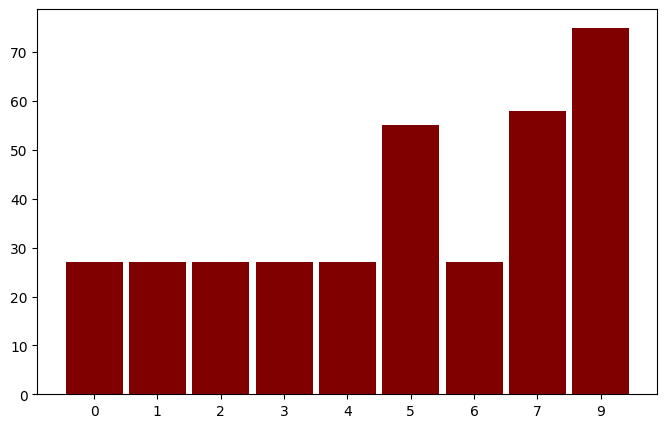

In [7]:
with open(r'./data/fmnist_sim_scores_boot.txt', 'r') as fp:
    sim_scores = [float(i) for i in fp.readlines()]

# Add new class to the linear model
linear_model_new_class = add_output_nodes(fmnist_file)

print(linear_model_new_class.state_dict())

sim_sum = sum(sim_scores)

sim_norms = [x/sim_sum for x in sim_scores]
print(sim_norms)

# they do this weird thing where the sample size for the boots class is set at 75 and everything not above a certain threshold is set to the same number of samples.
# you can see in the paper (not appendix) this figure, we've mostly approximated it. They also specify N=350 total.
boots_sample_size = 75
sim_sample_sizes = [27 if x < 0.2 else int(x * boots_sample_size*3.52) for x in sim_norms] + [75]
print(sim_sample_sizes)
print(sum(sim_sample_sizes))

fig = plt.figure(figsize = (8, 5))
plt.bar([str(x) for x in fmnist_classes], sim_sample_sizes, color ='maroon', width = 0.9)
plt.show()

In [8]:
# Create a dataloader which contains the samples in the distribution as described above
from random import sample

sampled_idxs = []

for i in range(len(fmnist_classes)):
    idx_sample = sample(class_idxs[i].tolist(), sim_sample_sizes[i])
    sampled_idxs += idx_sample

swil_train_subset = torch.utils.data.Subset(FMNIST_train_gen, sampled_idxs)

swil_train_dl = torch.utils.data.DataLoader(swil_train_subset, batch_size=1, shuffle=True, num_workers=2)

# what to do for testing??

In [9]:
def train(dataloader, model, loss_fn, optimizer, device, swap=False, swap_labels=[]) -> float:
    '''
        Model training loop. Performs a single epoch of model updates.
        
        * USAGE *
        Within a training loop of range(num_epochs).

        * PARAMETERS *
        dataloader: A torch.utils.data.DataLoader object
        model: A torch model which subclasses torch.nn.Module
        loss_fn: A torch loss function, such as torch.nn.CrossEntropyLoss
        optimizer: A torch.optim optimizer
        device: 'cuda' or 'cpu'

        * RETURNS *
        float: The model's average epoch loss 
    '''

    size = len(dataloader.dataset)
    train_loss = 0

    model.train()
    for batch, (X, y) in enumerate(dataloader):
        if swap:
            for i in range(len(y)):
                if y[i] == swap_labels[0]:
                    y[i] = swap_labels[1]
                    
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        
        # Compute prediction error
        pred = model(X)

        # Backpropagation
        
        loss = loss_fn(pred, y)
        
        loss.backward()
        optimizer.step()

        # Append lists
        train_loss += loss.item()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return train_loss/len(dataloader)


def test(dataloader, model, loss_fn, device, swap=False, swap_labels=[], classes = 9) -> float:
    '''
        Model test loop. Performs a single epoch of model updates.

        * USAGE *
        Within a training loop of range(num_epochs) to perform epoch validation, or after training to perform testing.

        * PARAMETERS *
        dataloader: A torch.utils.data.DataLoader object
        model: A torch model which subclasses torch.nn.Module
        loss_fn: A torch loss function, such as torch.nn.CrossEntropyLoss
        optimizer: A torch.optim optimizer
        device: 'cuda' or 'cpu'

        * RETURNS *
        float: The average test loss
    '''

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    correct = [0] * classes
    c = 0
    #test_loss, correct = 0, 0
    sizes = [0] * classes


    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            if swap:
                for i in range(len(y)):
                    if y[i] == swap_labels[0]:
                        y[i] = swap_labels[1]
                        
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            #if y.item() == 8:
            #    print("pred:", pred)
            
            # this is being appended incorrectly
            # val_pred = np.append(val_pred, pred.detach().cpu().numpy()) 
            # targets = np.append(targets, y.detach().cpu().numpy())
            
            test_loss += loss_fn(pred, y).item()
            correct[y.item()] += (pred.argmax(1) == y).type(torch.float).sum().item()
            c += (pred.argmax(1) == y).type(torch.float).sum().item()
            sizes[y.item()] += 1
            
    test_loss /= num_batches
    correct = [x / s for x, s in zip(correct, sizes)]
    c /= size
    
    
    #print(torch.FloatTensor(val_pred).shape)
    #print(torch.IntTensor(targets).shape)
    
    #recall = Recall(average='macro', num_classes=classes)
    #recall_val = recall(torch.FloatTensor(val_pred), torch.IntTensor(targets))

    print(
        f"Test Error: \n Total accuracy:{(100*c):>0.1f}%, Accuracy 0: {(100*correct[0]):>0.1f}%, Accuracy 1: {(100*correct[1]):>0.1f}%, Accuracy 2: {(100*correct[2]):>0.1f}%, Accuracy 3: {(100*correct[3]):>0.1f}%, Accuracy 4: {(100*correct[4]):>0.1f}%, Accuracy 5: {(100*correct[5]):>0.1f}%, Accuracy 6: {(100*correct[6]):>0.1f}%, Accuracy 7: {(100*correct[7]):>0.1f}%, Accuracy 9: {(100*correct[8]):>0.1f}% \n Avg loss: {test_loss:>8f} \n") #, Recall: {recall_val:>8f} \n")

    return test_loss, correct, c

In [10]:
# freeze first layer
for param in linear_model_new_class.parameters():
    param.requires_grad = False
    break

In [12]:
state_dict = linear_model_new_class.state_dict()

In [13]:
model = nets.LinearFashionMNIST_alt(28*28, 9)
model.load_state_dict(state_dict)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

num_epochs = 6

decay_rate = (EXP_DECAY/LEARNING_RATE)**(1/num_epochs)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate) 

model_file = './weights/linear_fashionmnist_holdout_[8]_frozen.pt'

device = 'cpu'

train_losses = []
test_losses = []
#t = trange(num_epochs)
t = range(num_epochs)
accuracies_over_time0 = []
accuracies_over_time1 = []
accuracies_over_time2 = []
accuracies_over_time3 = []
accuracies_over_time4 = []
accuracies_over_time5 = []
accuracies_over_time6 = []
accuracies_over_time7 = []
accuracies_over_time9 = []
total_acc_over_time = []

for epoch in t:
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train(swil_train_dl, model, loss_fn, optimizer, device, swap=True, swap_labels=[9,8])
    test_loss, accuracies, acc = test(no_bag_test_dl, model, loss_fn, device, swap=True, swap_labels=[9,8])
    accuracies_over_time0.append(accuracies[0])
    accuracies_over_time1.append(accuracies[1])
    accuracies_over_time2.append(accuracies[2])
    accuracies_over_time3.append(accuracies[3])
    accuracies_over_time4.append(accuracies[4])
    accuracies_over_time5.append(accuracies[5])
    accuracies_over_time6.append(accuracies[6])
    accuracies_over_time7.append(accuracies[7])
    accuracies_over_time9.append(accuracies[8])
    print(accuracies_over_time9)
    total_acc_over_time.append(acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    lr_scheduler.step()
    
torch.save(model.state_dict(), model_file)
print("Done!")

# need recall, accuracy (are we calculating that now?), cross-entropy loss (same?)

Epoch 1
-------------------------------
loss: 0.000000  [    0/  350]
Test Error: 
 Total accuracy:78.6%, Accuracy 0: 79.5%, Accuracy 1: 95.3%, Accuracy 2: 57.9%, Accuracy 3: 76.4%, Accuracy 4: 64.8%, Accuracy 5: 89.2%, Accuracy 6: 71.1%, Accuracy 7: 79.4%, Accuracy 9: 93.9% 
 Avg loss: 2.292288 

[0.939]
Epoch 2
-------------------------------
loss: 0.334041  [    0/  350]
Test Error: 
 Total accuracy:75.9%, Accuracy 0: 64.3%, Accuracy 1: 96.0%, Accuracy 2: 59.2%, Accuracy 3: 74.6%, Accuracy 4: 64.2%, Accuracy 5: 92.2%, Accuracy 6: 71.6%, Accuracy 7: 66.8%, Accuracy 9: 93.9% 
 Avg loss: 3.281724 

[0.939, 0.939]
Epoch 3
-------------------------------
loss: 0.000476  [    0/  350]
Test Error: 
 Total accuracy:78.9%, Accuracy 0: 71.7%, Accuracy 1: 96.5%, Accuracy 2: 77.6%, Accuracy 3: 70.0%, Accuracy 4: 65.5%, Accuracy 5: 87.4%, Accuracy 6: 64.8%, Accuracy 7: 82.0%, Accuracy 9: 94.6% 
 Avg loss: 2.435853 

[0.939, 0.939, 0.946]
Epoch 4
-------------------------------
loss: 0.000060  [ 

<function matplotlib.pyplot.xlim(*args, **kwargs)>

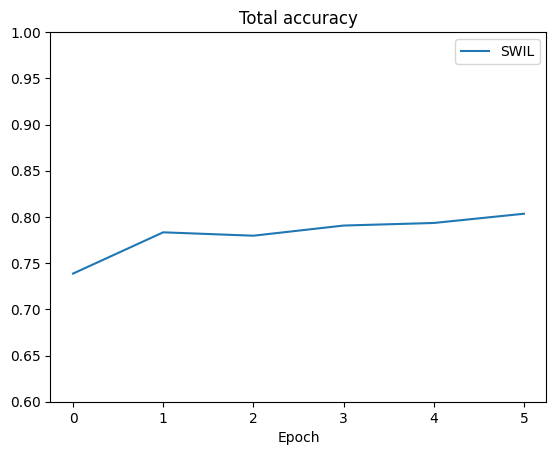

In [17]:
plt.figure()
plt.title('Total accuracy')
plt.xlabel('Epoch')

# Convert the MSE loss values to RMSE

#rmse_train_loss_log = np.sqrt(train_loss_log)
#rmse_val_loss_log = np.sqrt(val_loss_log)

#rmse_train_loss_log_ours = np.sqrt(train_loss_log_ours)
#rmse_val_loss_log_ours = np.sqrt(val_loss_log_ours)

plt.plot(total_acc_over_time, label='SWIL')
plt.ylim([.6, 1])
plt.legend()

plt.xlim

<function matplotlib.pyplot.xlim(*args, **kwargs)>

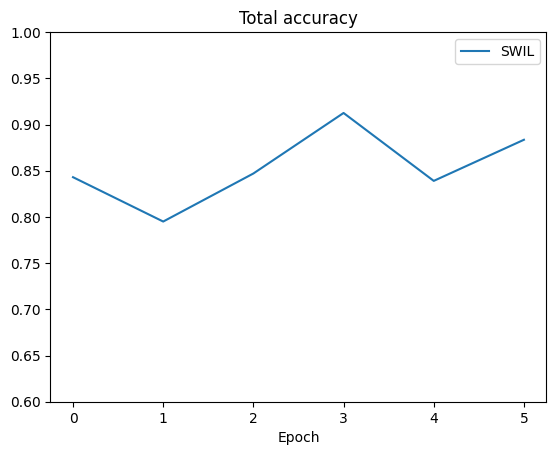

In [15]:
# similar old classes

old_sim_acc = []

for a1, a2 in zip(accuracies_over_time5, accuracies_over_time7):
    old_sim_acc.append((a1 + a2)/2)


plt.figure()
plt.title('Total accuracy')
plt.xlabel('Epoch')

plt.plot(old_sim_acc, label='SWIL')
plt.ylim([.6, 1])
plt.legend()
plt.xlim

<function matplotlib.pyplot.xlim(*args, **kwargs)>

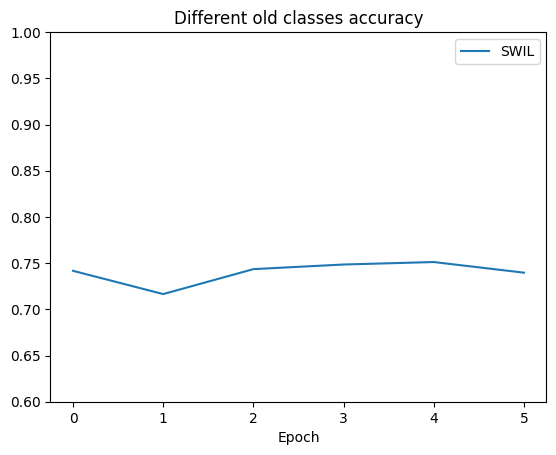

In [16]:
# Different old classes

old_sim_acc = []

for a0, a1, a2, a3, a4, a6 in zip(accuracies_over_time0, accuracies_over_time1, accuracies_over_time2, accuracies_over_time3, accuracies_over_time4, accuracies_over_time6):
    old_sim_acc.append((a0 + a1 + a2 + a3 + a4 + a6)/6)

plt.figure()
plt.title('Different old classes accuracy')
plt.xlabel('Epoch')

plt.plot(old_sim_acc, label='SWIL')
plt.ylim([.6, 1])
plt.legend()
plt.xlim

# CIFAR-10 CNN Adding New Class and Training

In [30]:
cifar10_model = CNN_demo(8)

cifar10_file = './weights/cnn-demo_cifar10_holdout_[8, 9].pt'

cifar10_model.load_state_dict(torch.load(cifar10_file))
cifar10_model.eval() # what is this doing again? should it be here?

print(cifar10_model.state_dict())

last_layer = 'fc3' # fc2 layer 
print("Layer to be extracted:", last_layer)

cifar10_feature_ext = FeatureExtractor(cifar10_model, [last_layer])

OrderedDict([('conv1.weight', tensor([[[[ 6.7791e-02,  1.2353e-01,  1.0751e-01,  1.5639e-01,  1.4792e-01],
          [ 1.3879e-01,  8.8699e-02,  4.8652e-02,  2.0042e-01,  1.6977e-01],
          [ 1.8208e-01,  2.6049e-02,  1.2981e-01,  1.9041e-01,  1.8164e-01],
          [ 8.0584e-02, -5.2795e-02,  6.8047e-02,  2.1969e-01, -2.3201e-02],
          [-8.4062e-02, -2.3261e-01, -1.8826e-01, -3.2048e-02, -1.1144e-01]],

         [[-9.3545e-02, -2.3241e-01, -1.7323e-01, -2.9873e-02, -6.3317e-02],
          [-9.3835e-02, -2.6738e-01, -2.0769e-01, -1.8397e-01,  5.4785e-02],
          [-7.2844e-02, -3.5640e-01, -2.8792e-01, -7.5282e-02, -2.2964e-02],
          [-1.8988e-02, -1.3033e-01, -1.6233e-01, -3.9842e-02,  8.2259e-02],
          [ 5.7391e-02, -1.3896e-01, -3.0448e-02,  3.4335e-02, -2.6561e-02]],

         [[-9.9156e-02, -3.3373e-03, -1.0138e-01,  1.1553e-01,  1.7816e-01],
          [-1.1923e-01, -8.2315e-02, -8.9157e-02,  8.7276e-02,  5.0822e-03],
          [ 1.5921e-05, -4.3525e-02, -1.71

In [1]:
test = 'fc3'
print([test])

['fc3']


In [31]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))])

cifar10_train_gen = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

cifar10_test_gen = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

# Dataloader for everything but car
no_car_idx = np.where((np.array(cifar10_test_gen.targets) != 1))[0]
no_car_subset = torch.utils.data.Subset(cifar10_test_gen, no_car_idx)
no_car_dl = torch.utils.data.DataLoader(no_car_subset, batch_size=batch_size, shuffle=True, num_workers=2)

#CIFAR10_classes = ('plane', 'car', 'bird', 'cat',
#           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# cat is the one added back in, idx 3

# going to have to shift this forward in a very weird and unfun way or else it won't like 'truck'

Files already downloaded and verified
Files already downloaded and verified


In [32]:
cifar10_classes = list(range(8))#[0] + list(range(2,10))
print(cifar10_classes)

class_subsets, class_idxs, subset_size = generate_dls(cifar10_train_gen, cifar10_classes)

[0, 1, 2, 3, 4, 5, 6, 7]


In [33]:
def extract_features(model: nn.Module, classes, class_subsets, subset_size):
    X = []
    y = []

    for i in range(len(classes)):
        for img, c in class_subsets[i]:
            with torch.no_grad():
                feature = model(img)
            X.append(feature['fc3'].numpy().flatten())
            y.append(classes[i])
    
    return np.array(X), np.array(y), subset_size

In [34]:
X, y, subset_size = extract_features(cifar10_feature_ext, cifar10_classes, class_subsets, subset_size)
avgs = get_lda_avgs(X, y, subset_size)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x25 and 400x120)

In [ ]:
sim_scores = get_similarity_vec(avgs)
print(sim_scores)

with open(r'./data/cifar10_sim_scores_cat.txt', 'w') as fp:
    for s in sim_scores:
        fp.write("%s\n" % s)

In [ ]:
with open(r'./data/cifar10_sim_scores_cat.txt', 'r') as fp:
    sim_scores = [float(i) for i in fp.readlines()]

# Add new class to the cnn model
# Is this implemented yet?
cnn_model_new_class = add_output_nodes(cifar10_file, num_new_outputs=1, arch='cnn')

print(cnn_model_new_class.state_dict())

sim_sum = sum(sim_scores)

# dog (idx 3) should be the closest by far
sim_norms = [x/sim_sum for x in sim_scores]
print(sim_norms)

cat_sample_size = 720
sim_sample_sizes = [int(x * cat_sample_size*3.52) for x in sim_norms] + [0]
# move the others around


print(sim_sample_sizes)
print(sum(sim_sample_sizes))

fig = plt.figure(figsize = (8, 5))
plt.bar([str(x) for x in cifar10_classes], sim_sample_sizes, color ='maroon', width = 0.9)
plt.show()

In [ ]:
# Create a dataloader which contains the samples in the distribution as described above
from random import sample

sampled_idxs = []

for i in range(len(cifar10_classes)):
    idx_sample = sample(class_idxs[i].tolist(), sim_sample_sizes[i])
    sampled_idxs += idx_sample

swil_train_subset = torch.utils.data.Subset(cifar10_train_gen, sampled_idxs)

swil_train_dl = torch.utils.data.DataLoader(swil_train_subset, batch_size=1, shuffle=True, num_workers=2)

# what to do for testing??

In [ ]:
# freeze first layer
for param in cnn_model_new_class.parameters():
    param.requires_grad = False
    break

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model_new_class.parameters(), lr=LEARNING_RATE)

num_epochs = 6

decay_rate = (EXP_DECAY/LEARNING_RATE)**(1/num_epochs)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate) 

model_file = './weights/linear_fashionmnist_holdout_[8]_frozen.pt'

device = 'cpu'

train_losses = []
test_losses = []
#t = trange(num_epochs)
t = range(num_epochs)
accuracies_over_time0 = []
accuracies_over_time1 = []
accuracies_over_time2 = []
accuracies_over_time3 = []
accuracies_over_time4 = []
accuracies_over_time5 = []
accuracies_over_time6 = []
accuracies_over_time7 = []
accuracies_over_time9 = []
total_acc_over_time = []

for epoch in t:
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train(swil_train_dl, cnn_model_new_class, loss_fn, optimizer, device, swap=True, swap_labels=[9,8])
    test_loss, accuracies, acc = test(no_bag_test_dl, cnn_model_new_class, loss_fn, device, swap=True, swap_labels=[9,8])
    accuracies_over_time0.append(accuracies[0])
    accuracies_over_time1.append(accuracies[1])
    accuracies_over_time2.append(accuracies[2])
    accuracies_over_time3.append(accuracies[3])
    accuracies_over_time4.append(accuracies[4])
    accuracies_over_time5.append(accuracies[5])
    accuracies_over_time6.append(accuracies[6])
    accuracies_over_time7.append(accuracies[7])
    accuracies_over_time9.append(accuracies[8])
    print(accuracies_over_time9)
    total_acc_over_time.append(acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    lr_scheduler.step()
    
torch.save(cnn_model_new_class.state_dict(), model_file)
print("Done!")

# need recall, accuracy (are we calculating that now?), cross-entropy loss (same?)